In [ ]:
!pip install Mecab

     |████████████████████████████████| 62 kB 515 kB/s 
     |████████████████████████████████| 62 kB 324 kB/s 
     |████████████████████████████████| 63 kB 442 kB/s 
ERROR: Could not find a version that satisfies the requirement Mecab (from versions: 0.996, 0.996.2, 0.996.3)
ERROR: No matching distribution found for Mecab


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 59.0 MB/s 


In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.models import load_model
from keras.layers import Dense, Activation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

model = load_model('/content/drive/MyDrive/best_sentimental_model.h5')

In [ ]:
model

In [ ]:
music_data = pd.read_excel('/content/drive/MyDrive/Music_melon.xlsx')
music_data.head()

,Unnamed: 0,title,artist,Album_date,LIKE,Album_name,Album_Genre,Lyric
0,0,TOMBOY,(여자)아이들,2022.03.14,"114,447",I NEVER DIE,록/메탈,Look at you 넌 못 감당해 날\nYa took off hook\n기분은 C...
1,1,GANADARA (Feat. 아이유),박재범,2022.03.11,"89,399",GANADARA,R&B/Soul,길거리를 걷다 보면\n사랑 노래만 흘러나와\n나는 왜 저런 게 낯설까\n난 한국말까...
2,2,Feel My Rhythm,Red Velvet (레드벨벳),2022.03.21,"84,493",‘The ReVe Festival 2022 - Feel My Rhythm’,댄스,Red Velvet\n\n무도회를 뒤집어\n작은 소란을 또 일으켜\nThis is ...
3,3,사랑인가 봐,멜로망스,2022.02.18,"52,662",사랑인가 봐 (사내맞선 OST 스페셜 트랙),"발라드, 국내드라마",너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...
4,4,취중고백,김민석 (멜로망스),2021.12.19,"100,247",취중고백,발라드,뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...


In [ ]:
music_data.rename(columns = {'Lyric' : 'text'}, inplace = True)

In [ ]:
x_data = music_data['text'].apply(lambda x : x.replace('\n', ' '))
x_data = x_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
x_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0       넌 못 감당해 날     기분은        나의  이름        네가 싫...
1    길거리를 걷다 보면 사랑 노래만 흘러나와 나는 왜 저런 게 낯설까 난 한국말까지 서...
2       무도회를 뒤집어 작은 소란을 또 일으켜          등장부터 인사까지 파격...
3    너와 함께 하고 싶은 일들을 상상하는 게 요즘 내 일상이 되고 너의 즐거워하는 모습...
4    뭐하고 있었니 늦었지만 잠시 나올래 너의 집 골목에 있는 놀이터에 앉아 있어 친구들...
Name: text, dtype: object

In [ ]:
print(sum(map(len, x_data)) / len(x_data))

561.4444444444445


In [ ]:
x_data = music_data['text']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data)


In [ ]:
len(tokenizer.word_index)

5618

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5618
등장 빈도가 1번 이하인 희귀 단어의 수: 3138
단어 집합에서 희귀 단어의 비율: 55.8561765752937
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.67452300785634


In [ ]:
print(tokenizer.word_index)

{'you': 1, 'i': 2, '내': 3, 'the': 4, 'my': 5, '난': 6, 'to': 7, 'me': 8, 'it': 9, '너를': 10, '날': 11, 'and': 12, '이': 13, '내가': 14, '그': 15, '널': 16, 'a': 17, '더': 18, '네가': 19, 'zu': 20, '수': 21, 'ooh': 22, '네': 23, '너의': 24, 'just': 25, 'oh': 26, 'that': 27, 'like': 28, '나': 29, 'in': 30, '다': 31, '없는': 32, 'la': 33, "i'm": 34, 'ah': 35, 'know': 36, 'so': 37, "rollin'": 38, 'love': 39, '나를': 40, '나의': 41, '지금': 42, 'i’m': 43, '너': 44, '우리': 45, 'back': 46, 'up': 47, 'we': 48, 'dance': 49, 'dun': 50, '해': 51, '걸': 52, '또': 53, 'no': 54, '다시': 55, 'on': 56, 'need': 57, '한': 58, 'get': 59, '보고': 60, '같은': 61, 'now': 62, '밤': 63, 'feel': 64, '건': 65, '안': 66, 'baby': 67, '모든': 68, 'na': 69, '봐': 70, '넌': 71, 'do': 72, '너와': 73, 'step': 74, 'when': 75, '거야': 76, 'are': 77, '있어': 78, 'woah': 79, 'be': 80, '우린': 81, 'yeah': 82, 'little': 83, 'your': 84, 'i’ll': 85, '이제': 86, 'never': 87, '손을': 88, '것': 89, 'make': 90, '내게': 91, 'wanna': 92, 'come': 93, 'how': 94, 'don’t': 95, '같아': 96, '게': 9

In [ ]:
total_cnt = len(tokenizer.word_index)
tokenizer = Tokenizer(total_cnt)
tokenizer.fit_on_texts(x_data)

x_data = tokenizer.texts_to_sequences(x_data)

In [ ]:
print(x_data[:3])

[[489, 722, 1, 71, 231, 2481, 11, 383, 1668, 575, 1669, 490, 1670, 28, 2482, 489, 722, 5, 2483, 41, 2484, 576, 2485, 2, 101, 7, 2486, 47, 62, 19, 2487, 106, 346, 1137, 77, 1, 2488, 1138, 491, 1671, 2489, 44, 72, 1, 102, 17, 2490, 2491, 1672, 125, 277, 492, 43, 277, 17, 1672, 723, 2492, 871, 384, 4, 1673, 7, 8, 383, 1674, 2493, 872, 428, 7, 8, 383, 149, 1675, 232, 1139, 3, 1676, 873, 1677, 1678, 24, 2494, 3, 98, 2495, 2496, 1679, 429, 43, 17, 493, 577, 35, 577, 429, 85, 80, 4, 493, 577, 35, 126, 127, 5, 1680, 429, 85, 80, 4, 493, 2, 95, 92, 578, 126, 1681, 1682, 2, 385, 2497, 1683, 17, 2498, 2499, 84, 2500, 2501, 1, 233, 17, 2502, 128, 126, 127, 2503, 143, 2, 28, 724, 2, 39, 725, 2504, 1684, 48, 2505, 1140, 2506, 2, 28, 7, 347, 56, 2507, 2508, 2, 874, 348, 9, 137, 4, 1685, 723, 2509, 871, 384, 4, 1673, 7, 8, 383, 1674, 2510, 875, 726, 7, 8, 383, 149, 1675, 232, 1139, 3, 386, 579, 58, 1686, 1678, 24, 2511, 1687, 2512, 2513, 1679, 429, 43, 17, 493, 577, 35, 577, 429, 85, 80, 4, 493, 577, 

리뷰의 최대 길이 : 514
리뷰의 평균 길이 : 215.989898989899


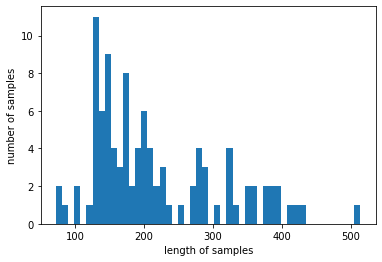

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_data))
print('리뷰의 평균 길이 :',sum(map(len, x_data))/len(x_data))
plt.hist([len(review) for review in x_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fb199264bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb199233bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1a0b9cc10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1a0b9c6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb199233150>,
  <matplotlib.lines.Line2D at 0x7fb199233690>]}

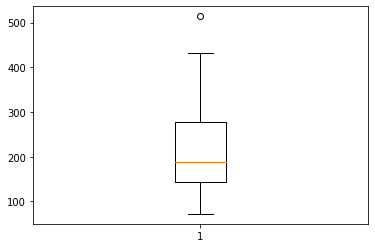

In [ ]:
length_of_review = np.array([len(data) for data in x_data])
plt.boxplot(length_of_review)

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 400
below_threshold_len(max_len, x_data)

전체 샘플 중 길이가 400 이하인 샘플의 비율: 95.95959595959596


In [ ]:
x_data = pad_sequences(x_data, maxlen = max_len)

In [ ]:
x_data

array([[   0,    0,    0, ...,    8, 1142,  493],
       [   0,    0,    0, ...,  214,   63,  587],
       [   0,    0,    0, ...,  736,  107,   67],
       ...,
       [   0,    0,    0, ...,  737,  258,  258],
       [   0,    0,    0, ...,  615,  154, 1080],
       [   0,    0,    0, ...,  209, 2480,   40]], dtype=int32)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         6648832   
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 6,780,803
Trainable params: 6,780,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from numpy import argmax
output = np.argmax(model.predict(x_data), axis = 1)
output

array([0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1])

In [ ]:
music_data['label'] = output

In [ ]:
# 0 : 기쁨, 행복 1 : 분노 2 : 불안, 당황 3 : 슬픔, 상처
music_data.head(20)

,Unnamed: 0,title,artist,Album_date,LIKE,Album_name,Album_Genre,text,label
0,0,TOMBOY,(여자)아이들,2022.03.14,"114,447",I NEVER DIE,록/메탈,Look at you 넌 못 감당해 날\nYa took off hook\n기분은 C...,0
1,1,GANADARA (Feat. 아이유),박재범,2022.03.11,"89,399",GANADARA,R&B/Soul,길거리를 걷다 보면\n사랑 노래만 흘러나와\n나는 왜 저런 게 낯설까\n난 한국말까...,2
2,2,Feel My Rhythm,Red Velvet (레드벨벳),2022.03.21,"84,493",‘The ReVe Festival 2022 - Feel My Rhythm’,댄스,Red Velvet\n\n무도회를 뒤집어\n작은 소란을 또 일으켜\nThis is ...,2
3,3,사랑인가 봐,멜로망스,2022.02.18,"52,662",사랑인가 봐 (사내맞선 OST 스페셜 트랙),"발라드, 국내드라마",너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...,0
4,4,취중고백,김민석 (멜로망스),2021.12.19,"100,247",취중고백,발라드,뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...,2
5,5,INVU,태연 (TAEYEON),2022.02.14,"94,339",INVU - The 3rd Album,댄스,Falling in love\n너에겐 난 Option\n시작부터 다른 너와 나\n깨...,2
6,6,듣고 싶을까,MSG워너비(M.O.M),2022.02.26,"48,866",듣고 싶을까,발라드,우리 함께 듣던 그 노랠 듣고 싶을까\n듣고 나서 잠시 날 생각은 할까\n아주 혹시...,1
7,7,사랑은 늘 도망가,임영웅,2021.10.11,"144,741",신사와 아가씨 OST Part.2,"발라드, 국내드라마",눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가...,2
8,8,RUN2U,STAYC(스테이씨),2022.02.21,"59,825",YOUNG-LUV.COM,댄스,RUN\nTold you not 또 괜한 기대\n겉으론 걱정해 난 안 바뀌네\n또 ...,1
9,9,언제나 사랑해,케이시 (Kassy),2022.02.07,"39,116",조영수 리메이크 프로젝트 Part.2,발라드,둘이 손잡고 걸을 때\n마주 보며 또 웃을 때\n사랑한다 말하지 않아도 알아\n널 ...,1


In [ ]:
music_data.head()

,Unnamed: 0,title,artist,Album_date,LIKE,Album_name,Album_Genre,text,label
0,0,TOMBOY,(여자)아이들,2022.03.14,"114,447",I NEVER DIE,록/메탈,Look at you 넌 못 감당해 날\nYa took off hook\n기분은 C...,0
1,1,GANADARA (Feat. 아이유),박재범,2022.03.11,"89,399",GANADARA,R&B/Soul,길거리를 걷다 보면\n사랑 노래만 흘러나와\n나는 왜 저런 게 낯설까\n난 한국말까...,2
2,2,Feel My Rhythm,Red Velvet (레드벨벳),2022.03.21,"84,493",‘The ReVe Festival 2022 - Feel My Rhythm’,댄스,Red Velvet\n\n무도회를 뒤집어\n작은 소란을 또 일으켜\nThis is ...,2
3,3,사랑인가 봐,멜로망스,2022.02.18,"52,662",사랑인가 봐 (사내맞선 OST 스페셜 트랙),"발라드, 국내드라마",너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...,0
4,4,취중고백,김민석 (멜로망스),2021.12.19,"100,247",취중고백,발라드,뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...,2


In [ ]:
music_data['label'].value_counts()

2    48
1    47
0     4
Name: label, dtype: int64

In [ ]:
music_data.to_csv('/content/drive/MyDrive/Music_melon.csv')

In [ ]:
text = ['난 지금 너를 때리고 싶다', '나는 나에게 누군가가 나타나서 꽃을 선물해 주었으면 좋겠어']
np.argmax(np.array([text]), axis = 1)

array([0])

In [ ]:
sentiment_data = pd.read_excel('/content/drive/MyDrive/sentiment_analysis.xlsx')
sentiment_data.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,NaN,NaN
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,NaN,NaN
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,NaN,NaN


In [ ]:
sentiment_data.fillna(' ', inplace = True)

In [ ]:
sentiment_data['text'] = sentiment_data['사람문장1'] + ' ' + sentiment_data['시스템응답1'] + ' ' + sentiment_data['사람문장2'].map(str) + ' ' + sentiment_data['시스템응답2'].map(str) + ' ' + sentiment_data['사람문장3'] + ' ' + sentiment_data['시스템응답3']
sentiment_data.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,text
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.,지금 난 기분이 너무 좋아. 굉장히 즐거우신 것 같은데요? 좋은 일이 있나요? 오늘...
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,,,나도 조카가 생겨! 너무 기뻐. 정말 좋은 소식이네요. 축하할 특별한 계획이 있을까...
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,,,거래처와의 다음 계약이 무산될까봐 불안해. 많이 걱정되시겠어요. 계약이 무산될 것 ...
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,,,노년에 재정적으로 이루어 놓은게 없어서 걱정이야. 나이들어 재정적으로 어려워서 걱정...


In [ ]:
sentimential_list = {'행복' : 0, '기쁨': 0, '분노' : 1, '불안' : 1, '당황' : 1, '슬픔' : 2, '상처' : 2}
sentiment_data['label'] = sentiment_data['감정_대분류'].map(sentimential_list)

In [ ]:
import random
x = random.randint(0, len(sentiment_data))
x

26177

In [ ]:
crowl_text, label = sentiment_data.loc[x, 'text'], sentiment_data.loc[x, 'label']

In [ ]:
crowl_text, label

('회식에 참여하지 않는다고 직장 동료들에게 따돌림을 받고 있어서 너무 억울해. 회식 참석 문제로 억울하셨군요. 집이 멀어서 회식 참여가 어렵다는 걸 말했는데도 그러니 억울해서 어떻게 해야 할지 모르겠어. 억울한 일을 겪고 매우 답답하시겠어요. 이럴 때 이야기를 나눌 분이 계실까요? 동기가 한 명 있어서 이야기해볼까 생각 중이야. 동기에게 속마음을 털어놓으실 생각이시군요.',
 2)

In [ ]:
music_lyrics = music_data[music_data['label'] == label][['title', 'artist', 'text']]
music_lyrics.loc['crowl_data'] = ['crowling_data', 'user', crowl_text]
music_lyrics.head()

,title,artist,text
1,GANADARA (Feat. 아이유),박재범,길거리를 걷다 보면\n사랑 노래만 흘러나와\n나는 왜 저런 게 낯설까\n난 한국말까...
2,Feel My Rhythm,Red Velvet (레드벨벳),Red Velvet\n\n무도회를 뒤집어\n작은 소란을 또 일으켜\nThis is ...
4,취중고백,김민석 (멜로망스),뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...
5,INVU,태연 (TAEYEON),Falling in love\n너에겐 난 Option\n시작부터 다른 너와 나\n깨...
7,사랑은 늘 도망가,임영웅,눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가...


In [ ]:
music_lyrics.drop('index', axis = 1, inplace = True)


KeyError: ignored

In [ ]:
music_lyrics[music_lyrics['artist'] == 'user']

,title,artist,text
crowl_data,crowling_data,user,회식에 참여하지 않는다고 직장 동료들에게 따돌림을 받고 있어서 너무 억울해. 회식 ...


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Okt

okt = Okt()
tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)

In [ ]:
tfidf.fit(music_lyrics['text'])

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), token_pattern=None,
                tokenizer=<bound method Okt.morphs of <konlpy.tag._okt.Okt object at 0x7fb19f14d490>>)

In [ ]:
music_lyrics.head()

,title,artist,text
1,GANADARA (Feat. 아이유),박재범,길거리를 걷다 보면\n사랑 노래만 흘러나와\n나는 왜 저런 게 낯설까\n난 한국말까...
2,Feel My Rhythm,Red Velvet (레드벨벳),Red Velvet\n\n무도회를 뒤집어\n작은 소란을 또 일으켜\nThis is ...
4,취중고백,김민석 (멜로망스),뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...
5,INVU,태연 (TAEYEON),Falling in love\n너에겐 난 Option\n시작부터 다른 너와 나\n깨...
7,사랑은 늘 도망가,임영웅,눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가...


In [ ]:
tfidf_matrix = tfidf.fit_transform(music_lyrics['text'])
cosine_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix)
recommendation_need = cosine_sim[-1]
recommendation_need

array([0.12680996, 0.07975433, 0.12891738, 0.02454563, 0.09452947,
       0.13874388, 0.10987393, 0.        , 0.12407644, 0.11020791,
       0.06327556, 0.08380817, 0.10460198, 0.12686388, 0.05822582,
       0.10279292, 0.02067299, 0.        , 0.13644146, 0.11525961,
       0.1223414 , 0.05713291, 0.09366569, 0.13145684, 0.06980241,
       0.06569259, 0.08815659, 0.02764616, 0.08866702, 0.11456588,
       0.17607029, 0.        , 0.01710832, 0.20359016, 0.05743564,
       0.        , 0.00988015, 0.14668776, 0.13020175, 0.10921573,
       0.06016646, 0.1573034 , 0.08148164, 0.02166443, 0.11126954,
       0.17904226, 0.08581614, 0.04638277, 1.        ])

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

#첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = np.argsort(recommendation_need)[::-1]
recommend_index= sorted_index[2:11]
music_lyrics.iloc[recommend_index]

,title,artist,text
94,취기를 빌려 (취향저격 그녀 X 산들),산들,언제부턴가 불쑥\n내 습관이 돼버린 너\n혹시나 이런 맘이\n어쩌면 부담일까\n널 ...
71,다시 사랑한다면 (김필 Ver.),임영웅,다시 태어난다면 다시 사랑한다면\n그때는 우리 이러지 말아요\n조금 덜 만나고 조금...
89,오늘도 빛나는 너에게 (To You My Light) (Feat.이라온),마크툽 (MAKTUB),별빛이 내린 밤\n그 풍경 속 너와 나\n날 새롭게 하는\n따뜻하게 만드는\n니 눈...
82,그대라는 사치,임영웅,그림 같은 집이 뭐 별거겠어요\n어느 곳이든 그대가 있다면\n그게 그림이죠\n빛나는...
14,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,내가 슬플 때마다\n이 노래가 찾아와\n세상이 둥근 것처럼 우린 동글동글\n\n인생...
41,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick),만남은 쉽고 이별은 어려워\n눈빛에 베일 듯 우린 날카로워\n마침표를 찍고 난 조금...
48,"사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)",호미들,울려댔어 사이렌\n텅 빈 길거리엔\n도망치다 흘린 칼자루와 피가 흥건해\n우리 그때...
84,흰눈,먼데이 키즈 (Monday Kiz),한 사람을 너무 사랑했던 거죠\n얼마나 나를\n아프게 할지도 모르고\n기뻐했죠\n이...
4,취중고백,김민석 (멜로망스),뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...
